In [1]:
import glob
import re
import pandas as pd
from yattag import Doc
import unicodedata
import os
import json
import numpy as np

In [2]:
doc, tag, text = Doc().tagtext()

In [39]:
txt_files = glob.glob('text/**/**/*.txt')
block_files = glob.glob('blocks/**/**/*.json')

In [61]:
all_contracts = []
for txt in txt_files:
    instances = re.findall('AVISO (?:de)? (?:.*REABERTURA)([\s\S]*?)\.\n|AVISO (?:de)? (?:.*NOVA ABERTURA)([\s\S]*?)\.\n',
                            unicodedata.normalize('NFKD', open(txt, encoding='utf-8').read()), 
                            re.IGNORECASE)
    all_contracts.extend(instances)

In [66]:
all_contracts_blocks = []
for js in block_files:
    list_blocks = json.loads(open(js, encoding='utf-8').read())
    for block in list_blocks:
        instances = re.findall('AVISO (?:de)? (?:.*REABERTURA)([\s\S]*?)\.\n|AVISO (?:de)? (?:.*NOVA ABERTURA)([\s\S]*?)\.\n',
                               unicodedata.normalize('NFKD', block[4]), 
                               re.IGNORECASE)
        all_contracts_blocks.extend(instances)

In [71]:
print(all_contracts)

midades Publicas e de \nEmergencias, cuja finalidade sera promover apoio e protecao a populacao em situacao de rua \natingida pelas medidas para enfrentamento do coronavirus, com a oferta de alojamentos \nprovisorios, atencoes e provisoes materiais, conforme as necessidades detectada. Meta de \nAtendimento: 200 (duzentas) pessoas simultaneamente; Teto estimado para a realizacao do \nobjeto: R$ 2.752.046,13 (dois milhoes, setecentos e cinquenta e dois mil quarenta e seis reais e \ntreze centavos); Vigencia para parceria: 90 (noventa) dias, prorrogaveis; Orientacoes tecnicas e \nregras a serem observadas: Nota Tecnica N.o 11/2020 - SEDES/SEADS/SUBSAS, disponivel \nno sitio eletronico www.sedes.df.gov.br; e, Modelo e envio das propostas: As propostas deverao \nser elaboradas conforme o modelo previsto no item 14 da Nota Tecnica N.o 11/2020 - \nSEDES/SEADS/SUBSAS e encaminhadas, em formato .pdf (Portable Document Format), \nanexa a correspondencia eletronica com o assunto "Dispensa de Cham

In [68]:
print(len(all_contracts))
print(len(all_contracts_blocks))

122
94


In [123]:
df_dict = {
    'descricao_objeto': [],
    'modalidade licitatoria': [],
    'processo': [],
    'objeto': [],
    'valor_estimado': [],
    'tipo': [],
#     'data_recebimento': [],
#     'data_abertura': [],
#     'data_sessao': [],
#     'fonte_recurso': [],
#     'unidade_orcamentaria': [],
#     'funcao': [],
#     'programa_trabalho': [],
#     'subtitulo': [],
#     'local': [],
#     'total_itens': [],
    'texto': [],
}

df_dict_block = {
    'descricao_objeto': [],
    'modalidade licitatoria': [],
    'processo': [],
    'objeto': [],
    'valor_estimado': [],
    'tipo': [],
#     'data_recebimento': [],
#     'data_abertura': [],
#     'data_sessao': [],
#     'fonte_recurso': [],
#     'unidade_orcamentaria': [],
#     'funcao': [],
#     'programa_trabalho': [],
#     'subtitulo': [],
#     'local': [],
#     'total_itens': [],
    'texto': [],
}

regex_dict = {
    'descricao_objeto': 'aviso.*(reabertura|nova abertura).*\n',
    'modalidade licitatoria': '([\wã]+) eletr[ôoO]nico(\D*)\d{2}\d?/\d{4}',
    'processo': 'processo[\s\S]*(\d{5}[\.|\-]\d{8}/\d{4}-\d{2})|\d{3}[\.|/-](\d{3}\.\d{3}|\d{6})/\d{4}', 
    'objeto': 'objeto[\s\S]*?:?([\s\S]*?)\. ',
    'valor_estimado': 'valor( [^\s]+)*([^\s/d]*,\d\d)', 
    'tipo': 'Tipo[:]?([\s\S]*?)\.',
#     'data_recebimento': '',
#     'data_abertura': '',
#     'data_sessao': '',
#     'fonte_recurso': '(?<= fonte\D*)\d+',
#     'unidade_orcamentaria': '(?<= unidade\D*)\d+',
#     'funcao': '(?<= fun[çc][ãa]o\D*)\d+',
#     'programa_trabalho': '(?<= programa\D*)\d+',
#     'subprograma': '(?<= subprograma\D*)\d+',
#     'subtitulo': '(?<= subt[ií]tulo\D*)\d+',
#     'local': '',
#     'total_itens': '',
}

In [124]:
for contract in all_contracts:
    df_dict['texto'].append(contract)
    for field in regex_dict:
        match = re.search(regex_dict[field], str(contract), re.IGNORECASE)
        if match:
            res = tuple(x for x in match.groups() if x is not None)
            df_dict[field].append(res[0])
        else:
            df_dict[field].append(np.nan)

df = pd.DataFrame.from_dict(df_dict)
df.to_csv('reabertura_regex.csv')
df

,descricao_objeto,modalidade licitatoria,processo,objeto,valor_estimado,tipo,texto
0,NaN,nPREGAO,00060-00500694/2018-02,Aquisicao de material de consumo COMPRESSAS D...,5.898.569,NaN,(\nPREGAO ELETRONICO POR SRP No 19/2019 - UASG...
1,NaN,nPREGAO,011994,Aquisicao de PRODUTOS PARA HIGIENIZACAO DE EN...,R$\n6.142.400,NaN,(\nPREGAO ELETRONICO POR SRP No 496/2018 - UAS...
2,NaN,nPREGAO,NaN,do procedimento\nadministrativo no 00080-0006...,972.157,NaN,( DE LICITACAO\nPREGAO ELETRONICO - SRP No 22/...
3,NaN,nPREGAO,000.354,Contratacao de empresa especializada\nna PRES...,193.668,Menor Preco por lote,( DE LICITACAO\nPREGAO ELETRONICO No 04/2018\n...
4,NaN,nPREGAO,NaN,Contratacao de empresa especializada para o f...,130.000,NaN,(\nPREGAO ELETRONICO No 01/2019\nObjeto: Contr...
...,...,...,...,...,...,...,...
117,NaN,nPREGAO,00080-00168056/2019-91,Aquisicao regular de Aquisicao de generos ali...,23.887.273,NaN,(\nPREGAO ELETRONICO SRP No 02/2020 - (UASG 45...
118,NaN,nPREGAO,00060-00486001/2018-53,Aquisicao regular do item CARBONATO DE CALCIO...,11.401.748,NaN,(\nPREGAO ELETRONICO POR SRP No 164/2019 - UAS...
119,NaN,NaN,00080-00049137/2019-92,e contratacao de empresa especializada para r...,9.357.214,NaN,(\nCONCORRENCIA No 01/2019\nA COMISSAO PERMANE...
120,NaN,nPREGAO,00095-00002038/2019-79,NaN,NaN,"Menor Valor\nno dia 14 de fevereiro de 2020, ...",( DE LICITACAO\nPREGAO ELETRONICO No 14/2019 S...


In [127]:
import matplotlib.pyplot as plt
import math

In [128]:
def pizza_plots(df, dim1, dim2):
    _, ax = plt.subplots(dim1, dim2, figsize=(15,15))
    cor = ['#1b9aaa', '#06d6a0']

    i = 0
    print(df.columns)
    df_aux = pd.DataFrame()
    dict_aux = {}
    for id in df.columns:
        total = len(df)
        aparicoes = df[id].count()
        labels = ["Com " + str(id), "Sem " + str(id)]
        size = [aparicoes, total - aparicoes]
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
        ax[math.floor(i/2), i%2].axis('off')
        i+=1

    plt.show()

Index(['descricao_objeto', 'modalidade licitatoria', 'processo', 'objeto',
       'valor_estimado', 'tipo', 'texto'],
      dtype='object')


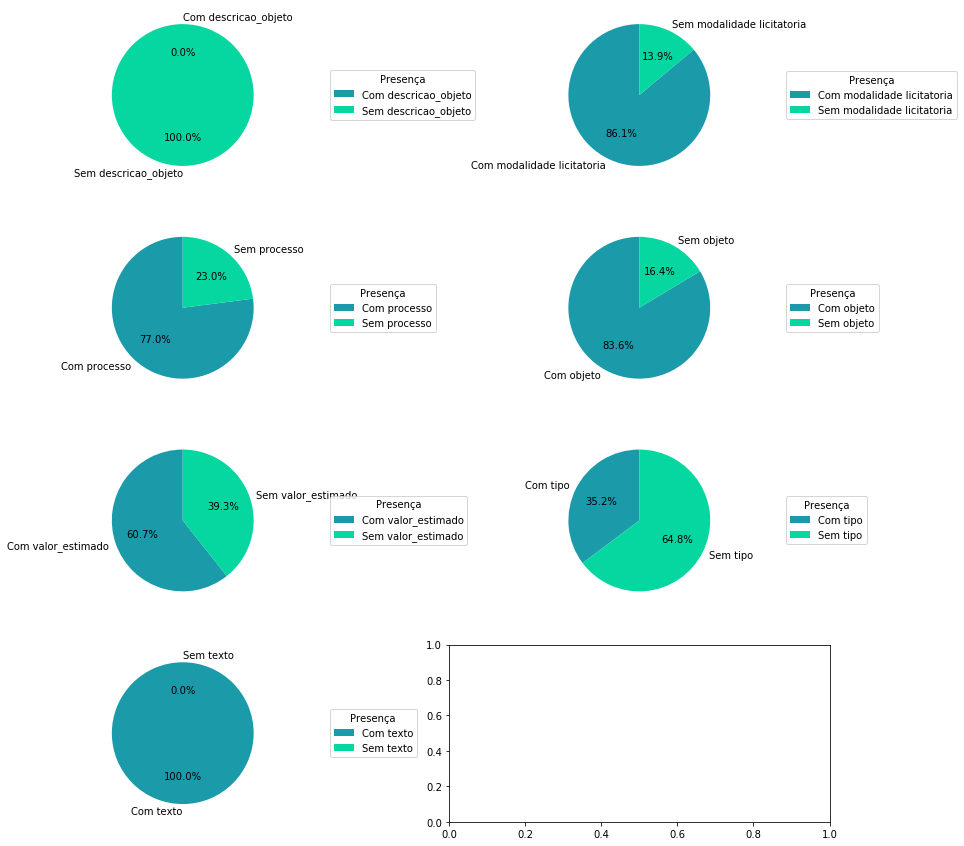

In [129]:
pizza_plots(df, 4, 2)

In [130]:
for contract in all_contracts_blocks:
    df_dict_block['texto'].append(contract)
    for field in regex_dict:
        match = re.search(regex_dict[field], str(contract), re.IGNORECASE)
        if match:
            res = tuple(x for x in match.groups() if x is not None)
            df_dict_block[field].append(res[0])
        else:
            df_dict_block[field].append(np.nan)

df = pd.DataFrame.from_dict(df_dict_block)
df.to_csv('reabertura_regex_block.csv')
df

,descricao_objeto,modalidade licitatoria,processo,objeto,valor_estimado,tipo,texto
0,NaN,nPREGAO,00060-00500694/2018-02,Aquisicao de material de consumo COMPRESSAS D...,5.898.569,NaN,(\nPREGAO ELETRONICO POR SRP No 19/2019 - UASG...
1,NaN,nPREGAO,NaN,Contratacao de empresa especializada para o f...,130.000,NaN,(\nPREGAO ELETRONICO No 01/2019\nObjeto: Contr...
2,NaN,nPREGAO,NaN,do procedimento\nadministrativo no 00080-0006...,972.157,NaN,( DE LICITACAO\nPREGAO ELETRONICO - SRP No 22/...
3,NaN,nPREGAO,000.354,Contratacao de empresa especializada\nna PRES...,193.668,Menor Preco por lote,( DE LICITACAO\nPREGAO ELETRONICO No 04/2018\n...
4,NaN,nPREGAO,00060.00104534/2018-28,"Aquisicao de material de ORTESES, PROTESES E ...",NaN,NaN,(\nPREGAO ELETRONICO POR SRP No 411/2018 - UAS...
...,...,...,...,...,...,...,...
89,NaN,nPREGAO,00401-00026569/2019-18,aquisicao de material de expediente - papel p...,NaN,de Licitacao: menor preco,( DE LICITACAO\nPREGAO ELETRONICO No 01/2020 -...
90,NaN,NaN,00080-00049137/2019-92,e contratacao de empresa especializada para r...,9.357.214,NaN,(\nCONCORRENCIA No 01/2019\nA COMISSAO PERMANE...
91,NaN,nPREGAO,00095-00002038/2019-79,NaN,NaN,"Menor Valor\nno dia 14 de fevereiro de 2020, ...",( DE LICITACAO\nPREGAO ELETRONICO No 14/2019 S...
92,NaN,nPREGAO,00080-00176348/2019-05,Registro de Precos para aquisicao de kits de ...,R$\n118.193.732,NaN,(\nPREGAO ELETRONICO SRP No 12/2019 - (UASG 45...


Index(['descricao_objeto', 'modalidade licitatoria', 'processo', 'objeto',
       'valor_estimado', 'tipo', 'texto'],
      dtype='object')


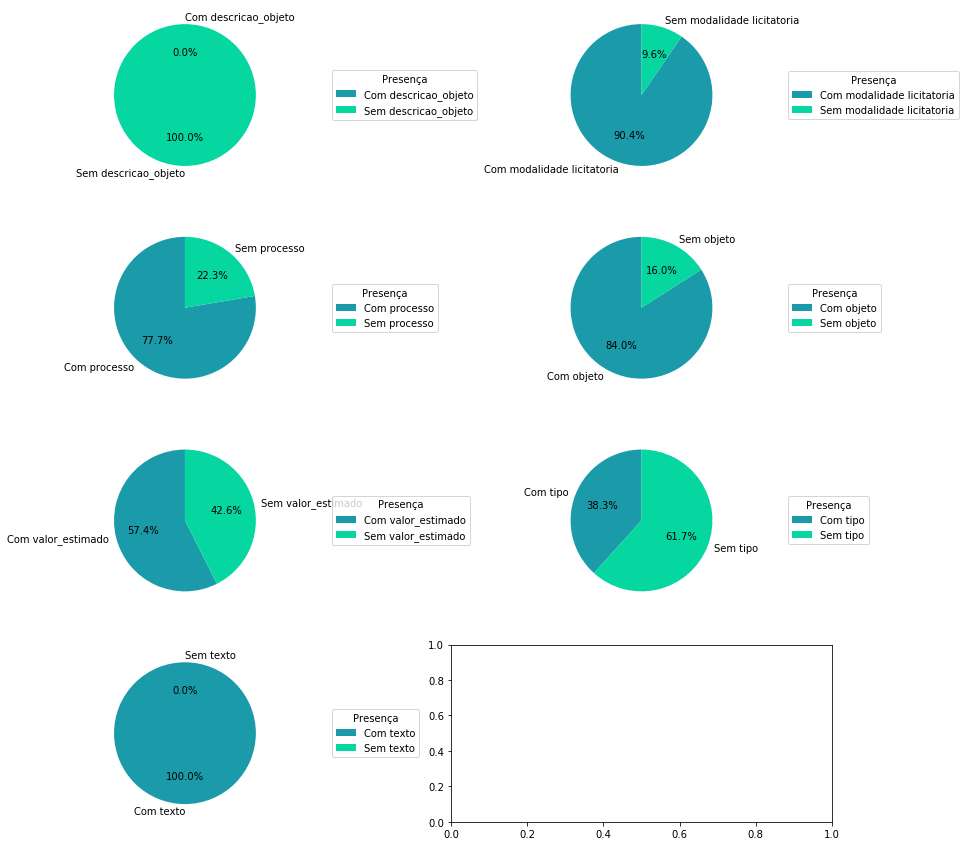

In [132]:
pizza_plots(df, 4, 2)